In [1]:
import pandas as pd
import seaborn as sns
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\HP1\Influencer.csv")
df.head(5)

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [3]:
df["Followers"]=df["Followers"].replace({"k":"*1e3", "m":"*1e6","b":"*1e9"}, regex=True).map(pd.eval)
df["Avg. Likes"]=df["Avg. Likes"].replace({"k":"*1e3", "m":"*1e6","b":"*1e9"}, regex=True).map(pd.eval)
df["Posts"]=df["Posts"].replace({"k":"*1e3", "m":"*1e6","b":"*1e9"}, regex=True).map(pd.eval)
df["New Post Avg. Likes"]=df["New Post Avg. Likes"].replace({"k":"*1e3", "m":"*1e6","b":"*1e9"}, regex=True).map(pd.eval)
df["Total Likes"]=df["Total Likes"].replace({"k":"*1e3", "m":"*1e6","b":"*1e9"}, regex=True).map(pd.eval)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    float64
 4   Avg. Likes           200 non-null    float64
 5   Posts                200 non-null    float64
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    float64
 8   Total Likes          200 non-null    float64
 9   Country Or Region    137 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 15.8+ KB


In [5]:
df.isnull().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

In [5]:
df["Country Or Region"]=df["Country Or Region"].fillna("Not Specified")

In [8]:
df["Country Or Region"].unique()

array(['Spain', 'United States', 'Not Specified', 'Canada', 'Brazil',
       'Netherlands', 'United Kingdom', 'India', 'Uruguay', 'Turkey',
       'Indonesia', 'Colombia', 'France', 'Australia', 'Italy',
       'United Arab Emirates', 'Puerto Rico', "CÃ´te d'Ivoire",
       'Anguilla', 'Switzerland', 'Sweden', 'British Virgin Islands',
       'Czech Republic', 'Mexico', 'Germany', 'Russia'], dtype=object)

In [6]:
df.isnull().sum()

Rank                   0
Channel Info           0
Influence Score        0
Followers              0
Avg. Likes             0
Posts                  0
60-Day Eng Rate        0
New Post Avg. Likes    0
Total Likes            0
Country Or Region      0
dtype: int64

In [6]:
df.describe()

,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes
count,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,2.000000e+02,2.000000e+02
mean,100.500000,81.850000,7.849100e+07,1.785050e+06,3460.425000,0.019160,1.224083e+06,3.644949e+09
std,57.879185,8.875323,7.492015e+07,2.192133e+06,3327.882197,0.032577,1.857624e+06,5.563069e+09
min,1.000000,22.000000,3.340000e+07,6.350000e+04,20.000000,0.000000,0.000000e+00,2.280000e+07
25%,50.750000,80.000000,4.067500e+07,4.990500e+05,938.250000,0.004000,2.187750e+05,1.075000e+09
50%,100.500000,84.000000,5.095000e+07,1.100000e+06,2100.000000,0.009500,5.671500e+05,2.050000e+09
75%,150.250000,86.000000,7.050000e+07,2.125000e+06,5025.000000,0.017250,1.300000e+06,4.025000e+09
max,200.000000,93.000000,4.852000e+08,1.540000e+07,16900.000000,0.250000,1.290000e+07,5.740000e+10


In [7]:
df1=df.drop(columns=["Channel Info","Country Or Region"],axis=True)

<Axes: >

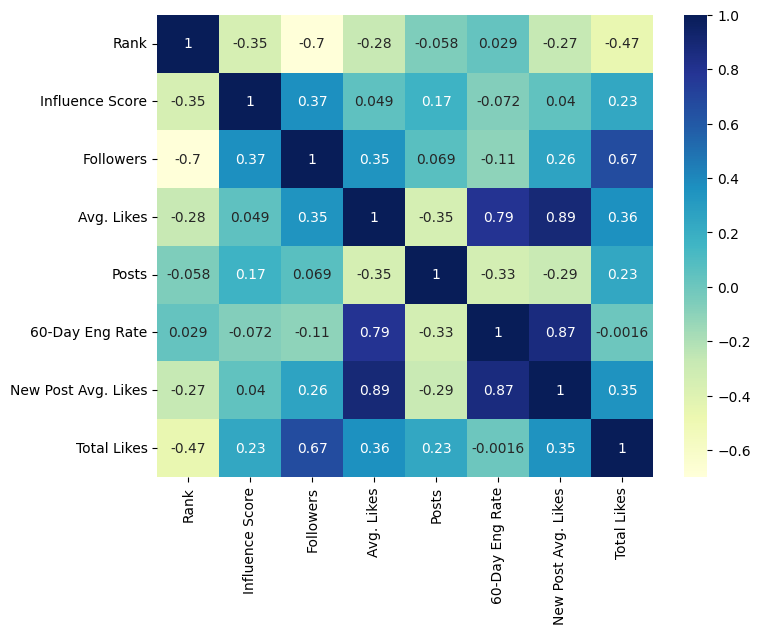

In [8]:
'''1. Are there any correlated features in the given dataset? If yes, state the correlation
     coefficient of the pair of features which are highly correlated.'''
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(),annot=True,cmap="YlGnBu")

Interpretation:

A correlation coefficient of 0.89 suggests a strong positive correlation between the average likes on a Instagrammer's posts and the average likes they have on new posts. This indicates that as the average likes on their previous posts increase, there is a high likelihood that the average likes on their new posts will also increase.

correlation coefficient of 0.87 indicates a strong positive correlation between followers and total likes. This means that as the number of followers increases, there is a high likelihood that the total likes will also increase.

correlation of 0.79 indicates a strong positive relationship between the average likes on Instagrammer posts and the last 60 days engagement rate. This means that as the Instagrammer's engagement rate increases, the average number of likes on their posts also tends to increase.



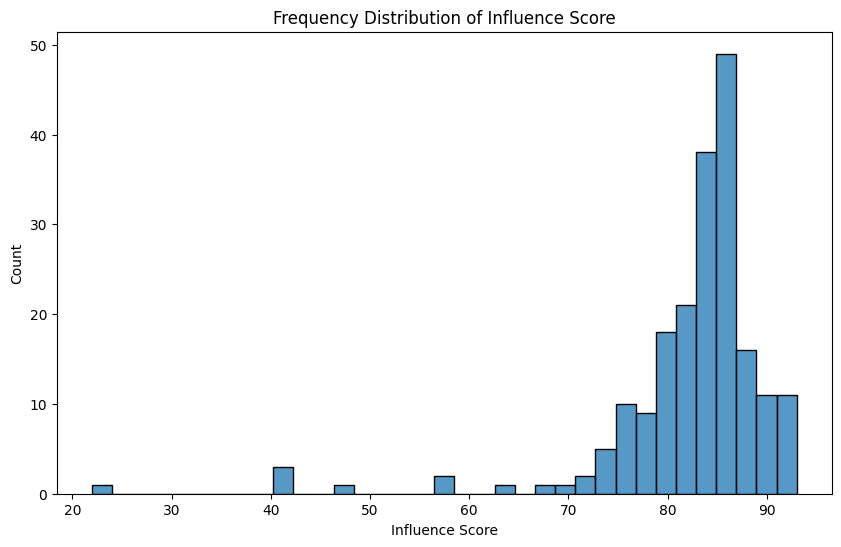

In [9]:
'''2. What is the frequency distribution of the following features?
○ Influence Score
○ Followers
○ Posts'''

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Influence Score")
plt.title('Frequency Distribution of Influence Score')
plt.show()


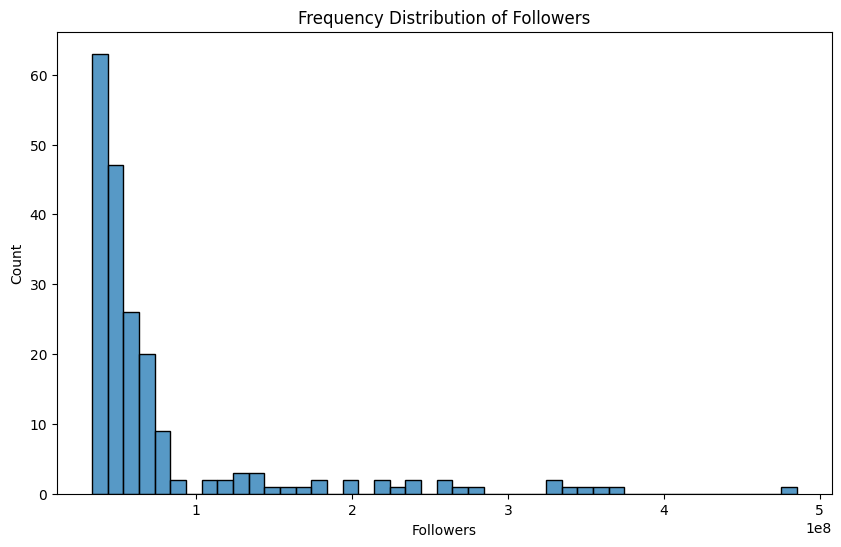

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Followers")
plt.title('Frequency Distribution of Followers')
plt.show()

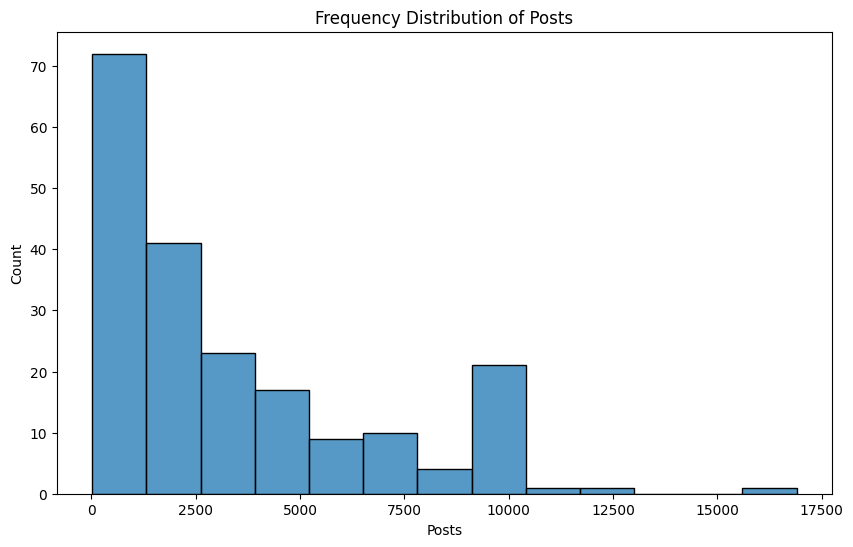

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Posts")
plt.title('Frequency Distribution of Posts')
plt.show()

In [13]:
'''3. Which country houses the highest number of Instagram Influencers? Please show the
count of Instagram influencers in different countries using barchart.'''
grouped_df = df['Influence Score'].groupby(df["Country Or Region"]).count().reset_index().sort_values(by='Influence Score',ascending=False)
grouped_df.columns = ['Country', 'Count']

# Printing the resulting DataFrame
print(grouped_df)

                   Country  Count
23           United States     65
2                   Brazil     13
10                   India     12
11               Indonesia      7
8                   France      6
17                   Spain      5
22          United Kingdom      4
4                   Canada      3
5                 Colombia      3
20                  Turkey      2
13                  Mexico      2
14             Netherlands      2
0                 Anguilla      1
21    United Arab Emirates      1
19             Switzerland      1
18                  Sweden      1
12                   Italy      1
16                  Russia      1
15             Puerto Rico      1
1                Australia      1
9                  Germany      1
7           CÃ´te d'Ivoire      1
6           Czech Republic      1
3   British Virgin Islands      1
24                 Uruguay      1


<Axes: title={'center': 'Country Vs Instagram Influencers'}, xlabel='Count', ylabel='Country'>

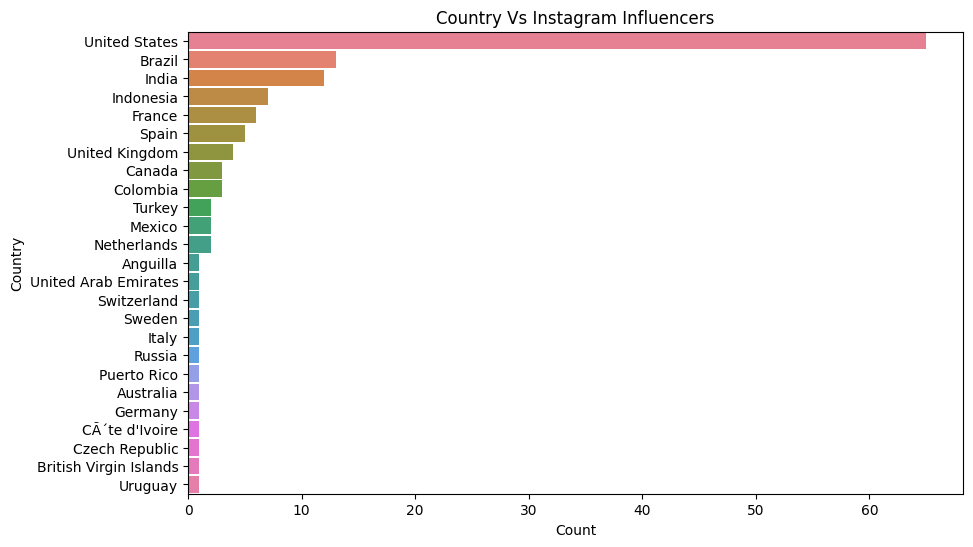

In [14]:
plt.figure(figsize=(10, 6))
plt.title("Country Vs Instagram Influencers")
sns.barplot(grouped_df, x="Count", y="Country",width=0.9,hue="Country")


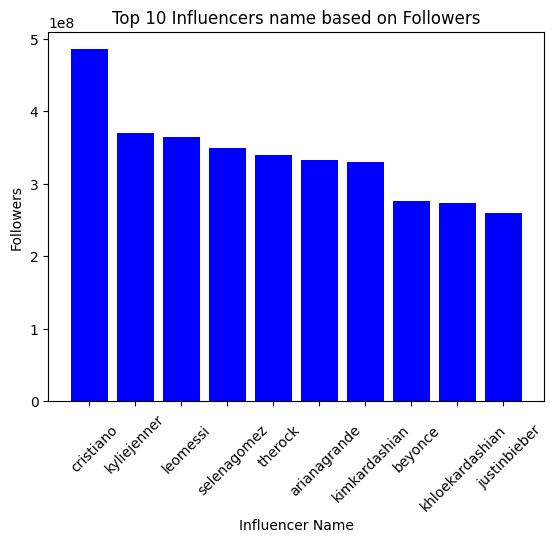

In [26]:
'''4. Who are the top 10 influencers in the given dataset based on the following features
● Followers
● Average likes
● Total Likes'''

#1 Sorting top 10 influencers based on followers
top_10=df.sort_values(by=['Followers'],ascending=False).head(10)
plt.bar(top_10['Channel Info'], top_10['Followers'],color="b")
plt.xlabel('Influencer Name')
plt.ylabel('Followers')
plt.title('Top 10 Influencers name based on Followers')
plt.xticks(rotation=45)
plt.show()


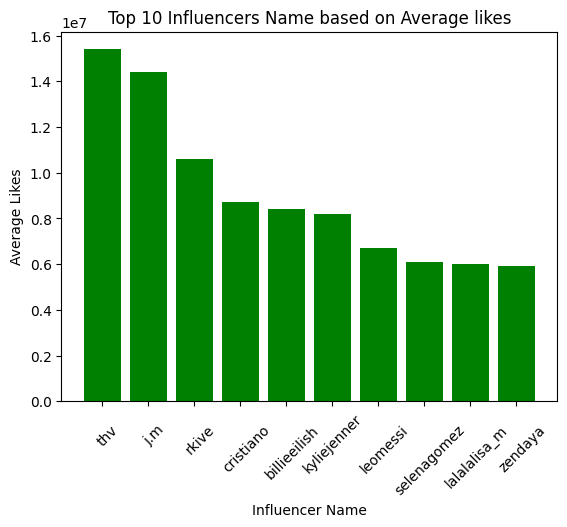

In [28]:
#2 sorting top 10 influencers based on average likes
top_10=df.sort_values(by=['Avg. Likes'],ascending=False).head(10)
plt.bar(top_10['Channel Info'], top_10['Avg. Likes'],color="g")
plt.xlabel('Influencer Name')
plt.ylabel('Average Likes')
plt.title('Top 10 Influencers Name based on Average likes')
plt.xticks(rotation=45)
plt.show()


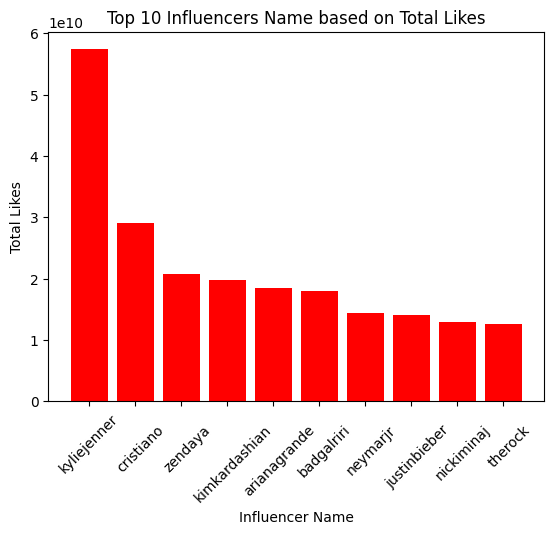

In [31]:
#2 sorting top 10 influencers based on total likes
top_10=df.sort_values(by=['Total Likes'],ascending=False).head(10)
plt.bar(top_10['Channel Info'], top_10['Total Likes'],color="r")
plt.xlabel('Influencer Name')
plt.ylabel('Total Likes')
plt.title('Top 10 Influencers Name based on Total Likes')
plt.xticks(rotation=45)
plt.show()


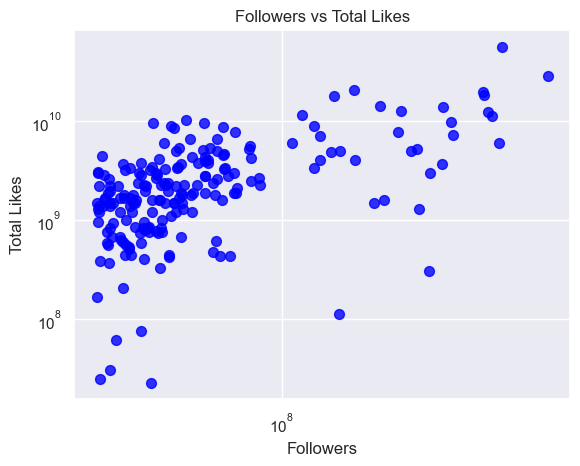

In [51]:
'''5. Describe the relationship between the following pairs of features using a suitable graph
● Followers and Total Likes
● Followers and Influence Score
● Posts and Average likes
● Posts and Influence Score'''

x=df["Followers"]
y=df["Total Likes"]
# Set seaborn context and style
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.scatter(data=df, x="Followers", y="Total Likes", s=50, alpha=0.8, c='blue')
# Set axis labels and plot title
plt.xlabel("Followers")
plt.ylabel("Total Likes")
plt.title("Followers vs Total Likes")
# Show the plot
plt.show()


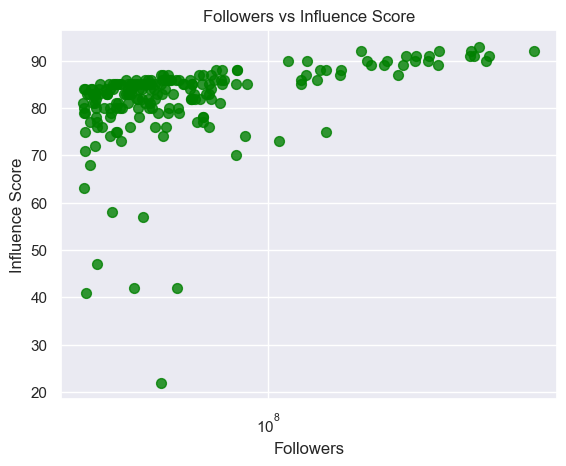

In [54]:
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.scatter(data=df, x="Followers", y="Influence Score",s=50, alpha=0.8, c='green')
plt.xlabel("Followers")
plt.ylabel("Influence Score")
plt.title("Followers vs Influence Score")
plt.show()


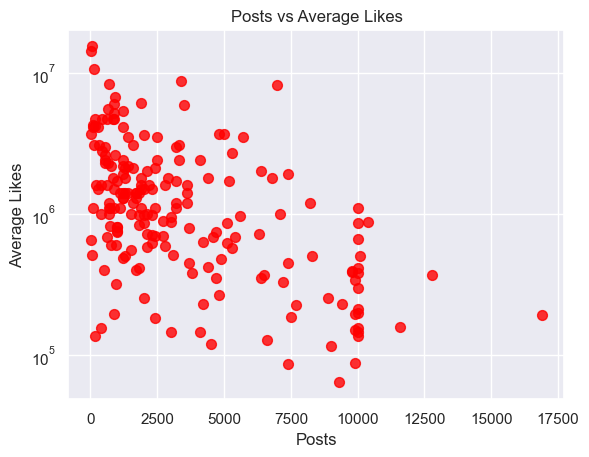

In [55]:
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.scatter(data=df,x="Posts",y='Avg. Likes',s=50, alpha=0.8, c='red')
plt.xlabel('Posts')
plt.ylabel('Average Likes')
plt.title('Posts vs Average Likes')
plt.show()


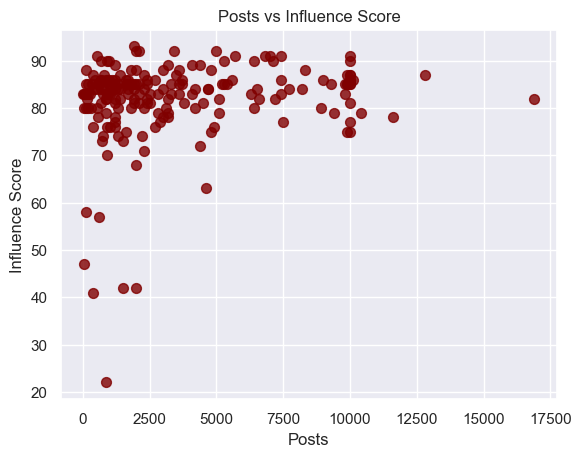

In [49]:
sns.set_context("notebook")
sns.set_style("darkgrid")
x=df["Posts"]
y=df["Influence Score"]
plt.scatter(data=df,x="Posts",y='Influence Score',s=50, alpha=0.8, c='maroon')
plt.xlabel('Posts')
plt.ylabel('Influence Score')
plt.title('Posts vs Influence Score')
plt.show()